In [1]:
import numpy as np
import pandas as pd 
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score # other metrics are allowed here.

## Data Pre-Processing

In [2]:
# Read in the csv file
data = pd.read_csv("cleveland.csv")

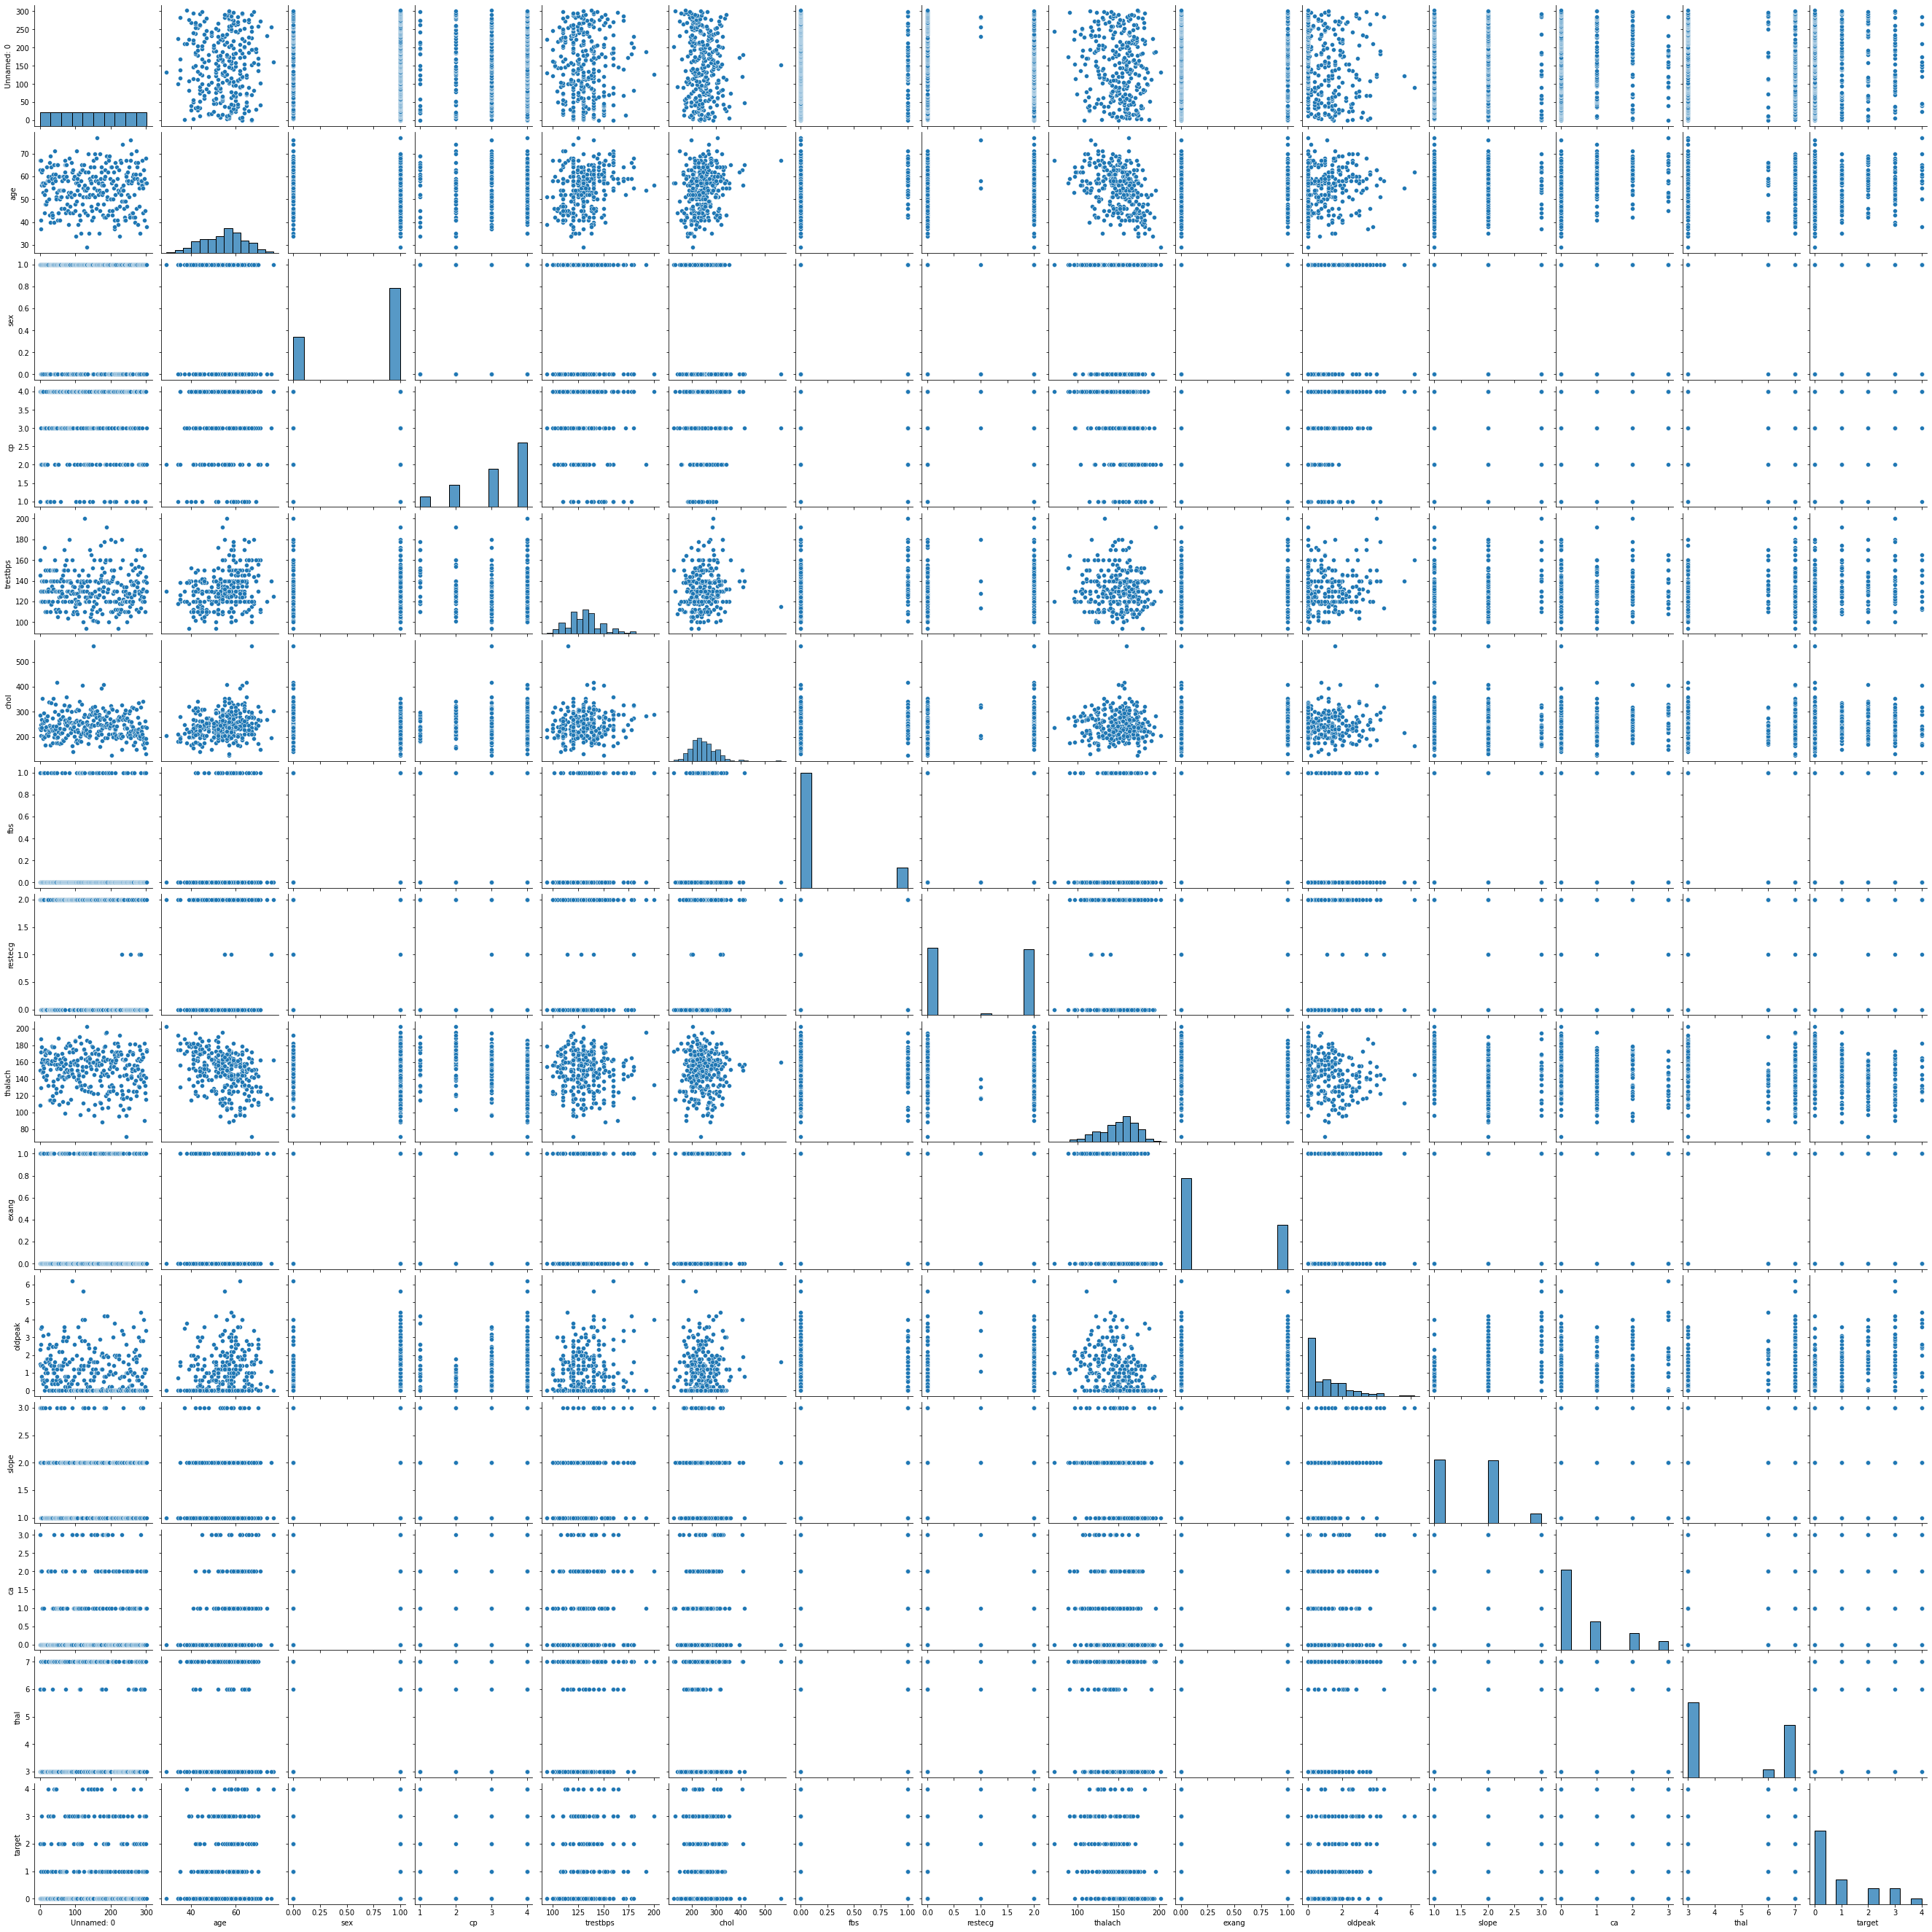

In [3]:
# pairplot to check the correlation
sns.pairplot(data)

In [4]:
data.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
data.tail()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,3.0,0


In [6]:
# read in the index file
with open('experiments.pkl', 'rb') as f:
    inds = pkl.load(f)

# shuffle the dataframe according to the index, and
# split the dataframe into 0.8/0.2 train-test sets.
train_inds, test_inds = inds[:int(0.8*len(inds))], inds[int(0.8*len(inds)):]

# convert the target value to {-1, 1}
# target value: 0-healthy, 1,2,3,4-high risk of heart disease
for i in range(len(data)):
    if data[data.columns[-1]][i] == 0:
        data[data.columns[-1]][i] = -1
    else:
        data[data.columns[-1]][i] = 1

C:\Users\lebro\AppData\Local\Temp\ipykernel_10752\2389755476.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data.columns[-1]][i] = -1
C:\Users\lebro\AppData\Local\Temp\ipykernel_10752\2389755476.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data.columns[-1]][i] = 1


In [7]:
data.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,-1
1,1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,-1
4,4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,-1


In [8]:
data.tail()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,3.0,-1


In [9]:
# scale the data (train & test) using the sklearn StandardScaler. 
import sklearn.preprocessing

data_val = data.values
scaler = sklearn.preprocessing.StandardScaler(with_mean=True, with_std=True)
data_val[:,:-1] = scaler.fit_transform(data_val[:,:-1])
data_scaled = pd.DataFrame(data_val[:,1:])
data_scaled.columns = data.columns[1:]

In [10]:
data_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.948726,0.686202,-2.251775,0.757525,-0.264900,2.394438,1.016684,0.017197,-0.696631,1.087338,2.274579,-0.711131,0.660004,-1.0
1,1.392002,0.686202,0.877985,1.611220,0.760415,-0.417635,1.016684,-1.821905,1.435481,0.397182,0.649113,2.504881,-0.890238,1.0
2,1.392002,0.686202,0.877985,-0.665300,-0.342283,-0.417635,1.016684,-0.902354,1.435481,1.346147,0.649113,1.432877,1.176752,1.0
3,-1.932564,0.686202,-0.165268,-0.096170,0.063974,-0.417635,-0.996749,1.637359,-0.696631,2.122573,2.274579,-0.711131,-0.890238,-1.0
4,-1.489288,-1.457296,-1.208521,-0.096170,-0.825922,-0.417635,1.016684,0.980537,-0.696631,0.310912,-0.976352,-0.711131,-0.890238,-1.0


In [11]:
data_scaled.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,-1.046013,0.686202,-2.251775,-1.234430,0.334813,-0.417635,-0.996749,-0.770990,-0.696631,0.138373,0.649113,-0.711131,1.176752,1.0
299,1.502821,0.686202,0.877985,0.700612,-1.038723,2.394438,-0.996749,-0.376896,-0.696631,2.036303,0.649113,1.432877,1.176752,1.0
300,0.283813,0.686202,0.877985,-0.096170,-2.238149,-0.417635,-0.996749,-1.515388,1.435481,0.138373,0.649113,0.360873,1.176752,1.0
301,0.283813,-1.457296,-1.208521,-0.096170,-0.206864,-0.417635,1.016684,1.068113,-0.696631,-0.896862,0.649113,0.360873,-0.890238,1.0
302,-1.821745,0.686202,-0.165268,0.359134,-1.386944,-0.417635,-0.996749,1.024325,-0.696631,-0.896862,-0.976352,-0.711131,-0.890238,-1.0


## Model Training and Simple Evaluation

In [12]:
import numpy as np
import math


def sigmoid(x):
    # the sigmoid function
    pass


class LogisticReg(object):
    def __init__(self, indim=1):
        # initialize the parameters with all zeros
        # w: shape of [d+1, 1]
        # pass
        self.w = np.zeros(shape=(indim + 1, 1))
    
    def set_param(self, weights, bias):
        # helper function to set the parameters
        # NOTE: you need to implement this to pass the autograde.
        # weights: vector of shape [d, ]
        # bias: scaler
        self.weights = weights
        self.bias = bias
        for i in range(len(weights)):
            self.w[i][0] = weights[i]
        self.w[len(weights)][0] = bias
        # print("self.w", self.w)
        # pass

    def sigmod(self, x):
        return 1.0/(1 + math.exp(-x))
    
    def get_param(self):
        # helper function to return the parameters
        # NOTE: you need to implement this to pass the autograde.
        # returns:
            # weights: vector of shape [d, ]
            # bias: scaler
        # pass
        return self.weights, self.bias
    
    def get_w(self):
        return self.w

    def compute_loss(self, X, t):
        # compute the loss
        # X: feature matrix of shape [N, d]
        # t: input label of shape [N, ]
        # NOTE: return the average of the log-likelihood, NOT the sum.

        # extend the input matrix

        NEW_X = np.ones(shape=(X.shape[0], X.shape[1] + 1))
        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                NEW_X[i][j] = X[i][j]

#         print("\nlen(t) ->", len(t))
#         print("t.type", type(t))
#         print("X.type", type(X))
#         print("t.shape ->", t.shape)
#         print("X.shape ->", X.shape)
#         print("NEW_X.shape ->", NEW_X.shape)
#         print("calc ->", np.dot(NEW_X, self.w))
        Y = np.dot(NEW_X, self.w)
#         print("sigmod ->", self.sigmod(Y[0]))

        loss = 0
        for i in range(len(t)):
            loss += -math.log(self.sigmod(t[i] * Y[i]))

#         print("loss ->", loss)
#         print("loss/len(t) ->", loss/len(t))
        # compute the loss and return the loss
        return loss/len(t)


    def compute_grad(self, X, t):
        # X: feature matrix of shape [N, d]
        # grad: shape of [d, 1]
        # NOTE: return the average gradient, NOT the sum.
        NEW_X = np.ones(shape=(X.shape[0], X.shape[1] + 1))
        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                NEW_X[i][j] = X[i][j]
        # pass
        Y = np.dot(NEW_X, self.w)
        grad = np.zeros(shape=(NEW_X.shape[1], ))
        for i in range(NEW_X.shape[1]):
            for j in range(len(t)):
                grad[i] += NEW_X[j][i]*(t[j] * self.sigmod(t[j] * Y[j]) - t[j])
            grad[i] /= len(t)
#         print("computed grad ->", grad)
        # print("NEW_X ->", NEW_X)
        return grad


    def update(self, grad, lr=0.001):
        # update the weights
        # by the gradient descent rule
        # self.w -= grad * lr
        w, b = self.get_param()
        w -= grad[:len(w)] * lr
        b -= grad[-1] * lr
        self.set_param(w, b)
        # pass


    def fit(self, X, t, test_x, test_y, lr=0.001, max_iters=1000, eps=1e-42):
        # implement the .fit() using the gradient descent method.
        # args:
        #   X: input feature matrix of shape [N, d]
        #   t: input label of shape [N, ]
        #   lr: learning rate
        #   max_iters: maximum number of iterations
        #   eps: tolerance of the loss difference 
        # TO NOTE: 
        #   extend the input features before fitting to it.
        #   return the weight matrix of shape [indim+1, 1]
        print("\n========================================================\n",
             lr, max_iters, eps, "\n===================================================\n")

        loss = 1e10
        loss_list = []
        acc_list = []
        for epoch in range(max_iters):
            # compute the loss 
            new_loss = self.compute_loss(X, t)
            new_acc, pred_y = self.compute_acc(test_x, test_y)
            
            loss_list.append(new_loss)
            acc_list.append(new_acc)
            
            if epoch % 1000 == 0:
                print("Epoch ->", epoch + 1, "\t\tLoss ->", new_loss, "\t\tAcc ->", new_acc)

            # compute the gradient
            grad = self.compute_grad(X, t)

            # update the weight
            self.update(grad, lr=lr)

            # decide whether to break the loop
            if np.abs(loss - new_loss) < eps or epoch == max_iters - 1:
                print("Training Finished at Epoch ->", epoch + 1, "Loss ->", new_loss, "Acc ->", new_acc)
                _, pred_y = self.compute_acc(test_x, test_y)
                return self.w, loss_list, acc_list, pred_y
            loss = new_loss if new_loss < loss else loss


    def predict_prob(self, X):
        # implement the .predict_prob() using the parameters learned by .fit()
        # X: input feature matrix of shape [N, d]
        #   NOTE: make sure you extend the feature matrix first,
        #   the same way as what you did in .fit() method.
        # returns the prediction (likelihood) of shape [N, ]
        NEW_X = np.ones(shape=(X.shape[0], X.shape[1] + 1))
        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                NEW_X[i][j] = X[i][j]
        RET = np.zeros(shape=(len(X), ))
        Y = np.dot(NEW_X, self.w)
        for i in range(len(X)):
            RET[i] = self.sigmod(Y[i])
        return RET
        # pass

    def predict(self, X, threshold=0.5):
        # implement the .predict() using the .predict_prob() method
        # X: input feature matrix of shape [N, d]
        # returns the prediction of shape [N, ], where each element is -1 or 1.
        # if the probability p>threshold, we determine t=1, otherwise t=-1
        # pass
        RET = self.predict_prob(X)
#         print("RET.shape ->", RET.shape)
        T = np.zeros(shape=RET.shape)
        for i in range(len(T)):
            T[i] = 1 if RET[i] > threshold else -1
        return T

    def compute_acc(self, test_x, test_y):
        pred_y = self.predict(test_x)
        right = 0
        for i in range(len(test_y)):
            if test_y[i] == pred_y[i]:
                right += 1
        acc = right/len(test_y)
        return acc, pred_y


In [13]:
data_val = data_scaled.values
train_data, test_data = data_val[train_inds], data_val[test_inds]

In [14]:
print(train_data.shape)
print(test_data.shape)

(242, 14)
(61, 14)


In [15]:
train_x, train_y = train_data[:, :-1], train_data[:, -1]
test_x, test_y = test_data[:, :-1], test_data[:, -1]

In [16]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(242, 13)
(242,)
(61, 13)
(61,)


In [17]:
# logistic regression
# upload your logistic_regression.py 
# from logisitic_regression import LogisticReg

# create the model
model = LogisticReg(indim=train_x.shape[1])

weights, bias = np.random.uniform(-1, 1, size=(train_x.shape[1],)), np.random.uniform(-1,1)
ori_w, ori_b = np.copy(weights), np.copy(bias)
model.set_param(weights, bias)
w, b = model.get_param()
print(model.get_w())

print(model.compute_acc(test_x, test_y))

# compute the gradient
grad = model.compute_grad(train_x, train_y)

# update the weight
model.update(grad, lr=0.1)

print(model.get_w())

print(model.compute_acc(test_x, test_y))

# train the model

# plot the training & test losses.

[[ 0.4231944 ]
 [-0.64331616]
 [-0.11697134]
 [ 0.375909  ]
 [ 0.00266313]
 [-0.10905082]
 [-0.07427394]
 [-0.55282546]
 [ 0.58279349]
 [-0.34122868]
 [ 0.27558161]
 [ 0.84977548]
 [-0.35857243]
 [-0.33157967]]
(0.6065573770491803, array([-1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1.,
       -1., -1., -1., -1.,  1., -1., -1.,  1.,  1., -1., -1., -1.,  1.,
        1.,  1.,  1., -1., -1.,  1., -1.,  1., -1.,  1., -1., -1., -1.,
       -1., -1.,  1.,  1., -1., -1.,  1.,  1., -1., -1., -1., -1., -1.,
        1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1.]))
[[ 4.17691160e-01]
 [-6.16689066e-01]
 [-1.00940187e-01]
 [ 3.74508434e-01]
 [ 2.46660322e-04]
 [-1.08919833e-01]
 [-6.98375828e-02]
 [-5.58517461e-01]
 [ 5.92657526e-01]
 [-3.24829917e-01]
 [ 2.86574183e-01]
 [ 8.55596350e-01]
 [-3.30570922e-01]
 [-3.29331980e-01]]
(0.6065573770491803, array([-1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1.,
       -1., -1., -1., -1.,  1., -1., -1.,  1.,  1., -1., -1., -1.,

In [18]:
W_list = []
Loss_list = []
Acc_list = []
Pred_list = []
lr_list = [0.1, 0.01, 0.001, 0.0001]

for lr in lr_list:
#     weights, bias = np.random.uniform(-1, 1, size=(train_x.shape[1],)), np.random.uniform(-1,1)
    model.set_param(np.copy(ori_w), np.copy(ori_b))
    W, loss_list, acc_list, pred_y = model.fit(train_x, train_y, test_x, test_y, lr=lr, max_iters=10000)
    W_list.append(W)
    Loss_list.append(loss_list)
    Acc_list.append(acc_list)
    Pred_list.append(pred_y)


 0.1 10000 1e-42 

Epoch -> 1 		Loss -> 0.6984471807647269 		Acc -> 0.6065573770491803
Epoch -> 1001 		Loss -> 0.2889636352437756 		Acc -> 0.7704918032786885
Epoch -> 2001 		Loss -> 0.28878876376985524 		Acc -> 0.7540983606557377
Epoch -> 3001 		Loss -> 0.28878447839082777 		Acc -> 0.7540983606557377
Epoch -> 4001 		Loss -> 0.28878436613667097 		Acc -> 0.7540983606557377
Epoch -> 5001 		Loss -> 0.2887843631668887 		Acc -> 0.7540983606557377
Epoch -> 6001 		Loss -> 0.2887843630881955 		Acc -> 0.7540983606557377
Training Finished at Epoch -> 6905 Loss -> 0.28878436308613376 Acc -> 0.7540983606557377

 0.01 10000 1e-42 

Epoch -> 1 		Loss -> 0.6984471807647269 		Acc -> 0.6065573770491803
Epoch -> 1001 		Loss -> 0.31083151352838634 		Acc -> 0.7049180327868853
Epoch -> 2001 		Loss -> 0.2960342557135356 		Acc -> 0.7377049180327869
Epoch -> 3001 		Loss -> 0.2924367187754752 		Acc -> 0.7540983606557377
Epoch -> 4001 		Loss -> 0.29092538917901295 		Acc -> 0.7540983606557377
Epoch -> 5001 		Los

In [19]:
def plot_loss(loss_list, acc_list):
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.plot(loss_list, linewidth=4, label="Training Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='upper right')
    plt.subplot(1, 2, 2)
    plt.plot(acc_list, color="orange", linewidth=4, label="Training Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc='upper right')
    plt.show()

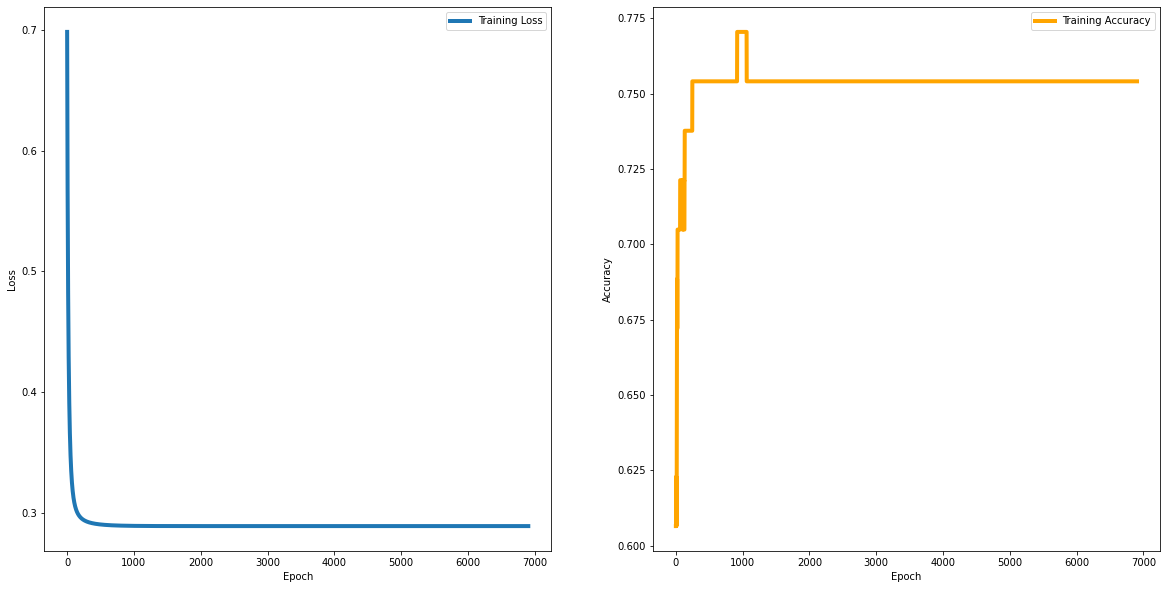

In [20]:
plot_loss(Loss_list[0], Acc_list[0])

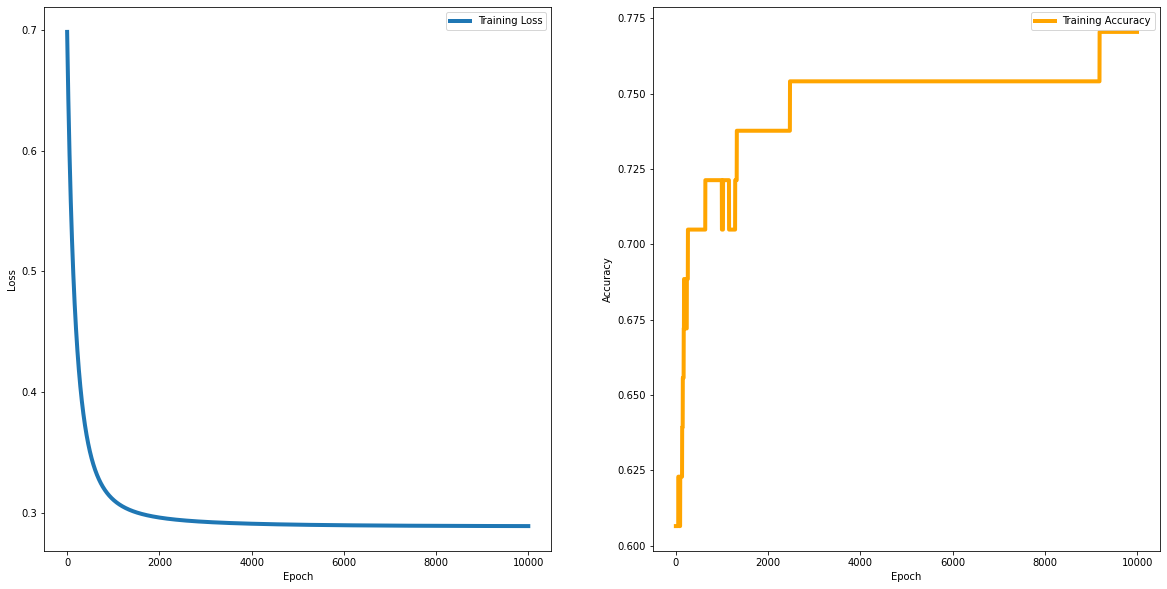

In [21]:
plot_loss(Loss_list[1], Acc_list[1])

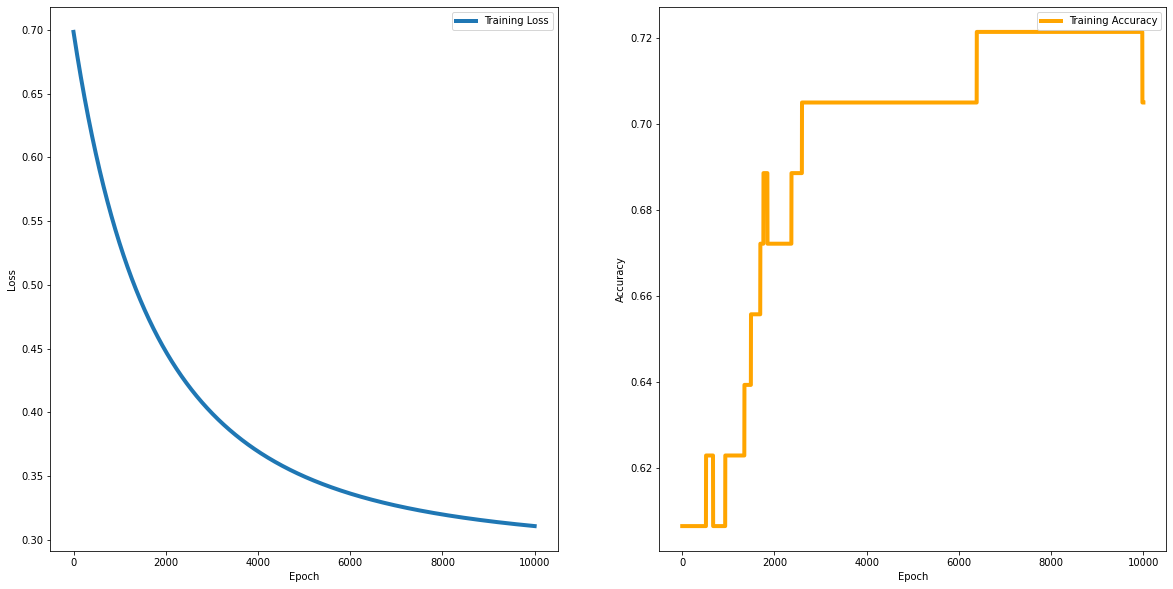

In [22]:
plot_loss(Loss_list[2], Acc_list[2])

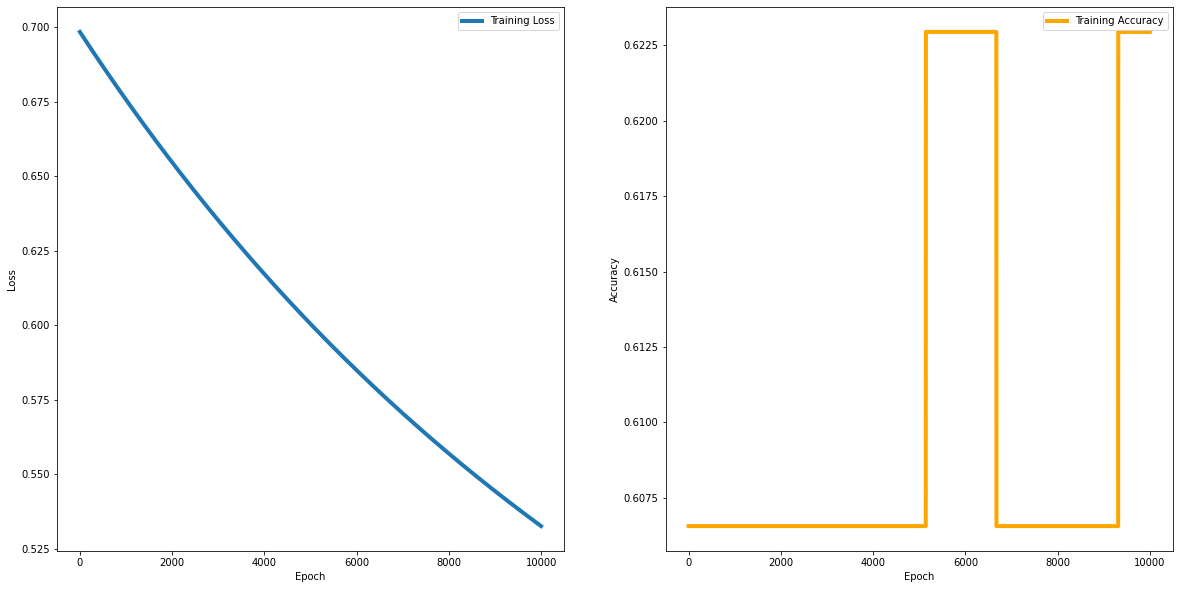

In [23]:
plot_loss(Loss_list[3], Acc_list[3])

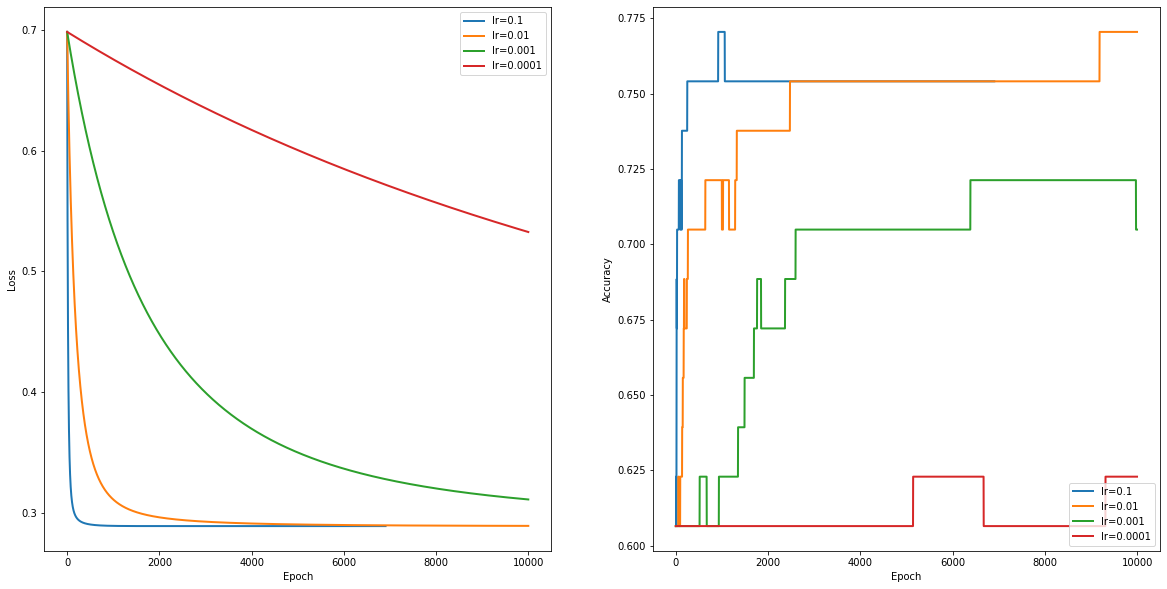

In [24]:
# report the training and testing accuracies
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
for i in range(len(lr_list)):
    plt.plot(Loss_list[i], linewidth=2, label="lr=" + str(lr_list[i]))
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='upper right')
plt.subplot(1, 2, 2)
for i in range(len(lr_list)):
    plt.plot(Acc_list[i], linewidth=2, label="lr=" + str(lr_list[i]))
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.show()

## Classification Metrics

In [25]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, roc_curve, auc, roc_auc_score

def disp_cm(test_y, pred_y):
    cm = confusion_matrix(test_y, pred_y, labels=[-1, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[-1, 1])
    disp.plot()
    plt.show()
    fpr, tpr, thresholds = roc_curve(test_y, pred_y, pos_label=1)
    return f1_score(test_y, pred_y, average="binary"), roc_auc_score(test_y, pred_y) # , auc(fpr, tpr)

# F1 Score

# Other metrics

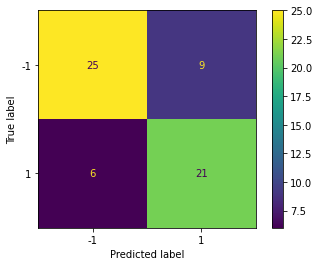

(0.7368421052631577, 0.7565359477124183)

In [26]:
disp_cm(test_y, Pred_list[0])

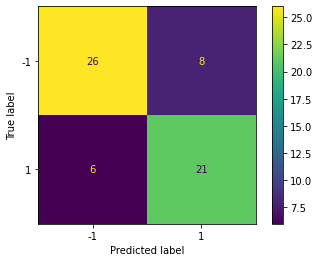

(0.75, 0.7712418300653594)

In [27]:
disp_cm(test_y, Pred_list[1])

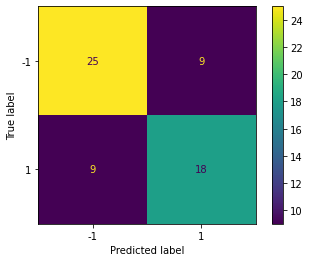

(0.6666666666666666, 0.7009803921568628)

In [28]:
disp_cm(test_y, Pred_list[2])

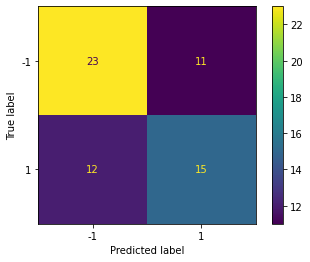

(0.5660377358490566, 0.6160130718954249)

In [29]:
disp_cm(test_y, Pred_list[3])

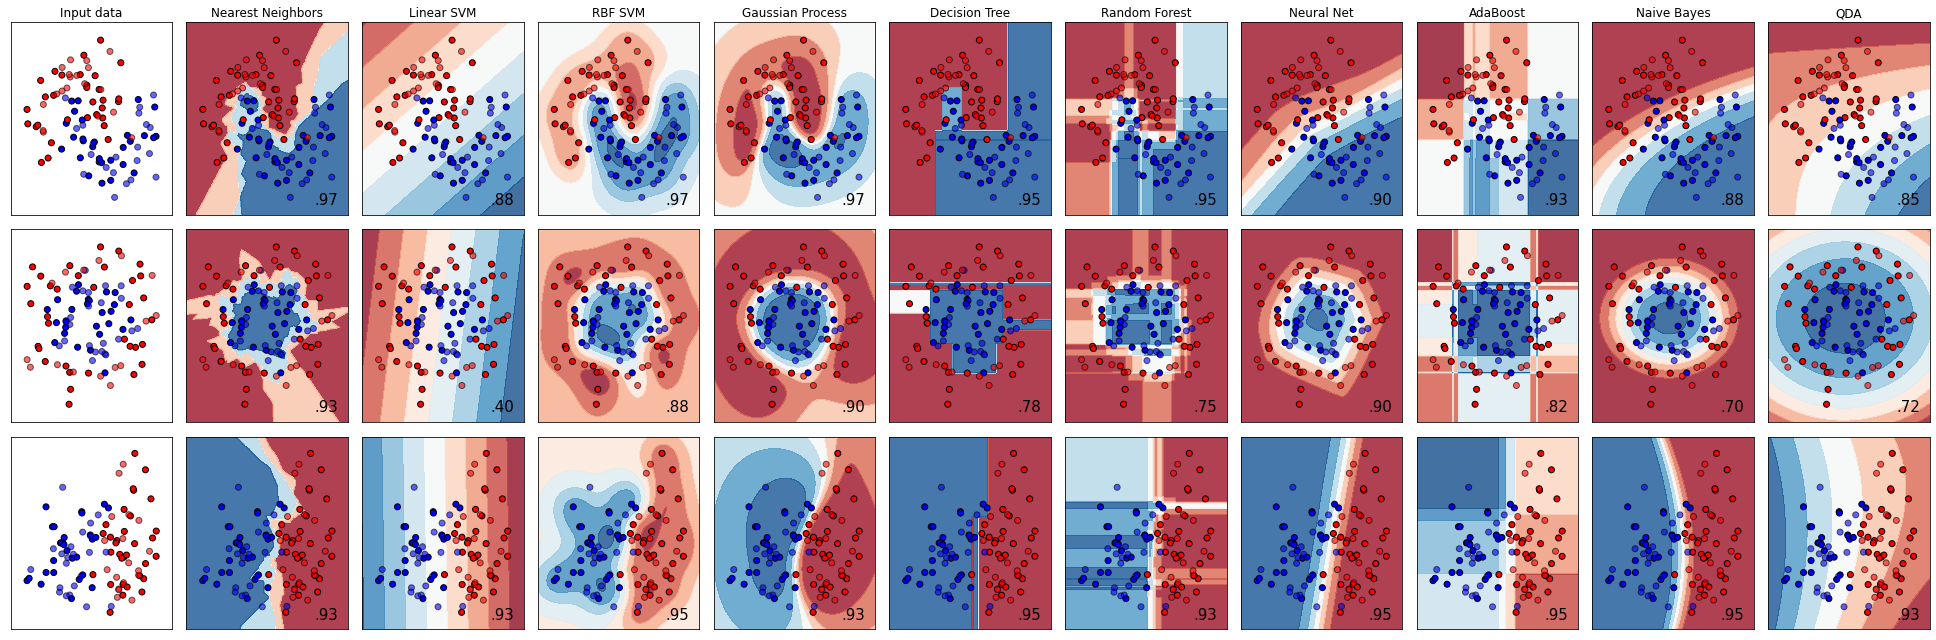

In [30]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = 0.02  # step size in the mesh

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

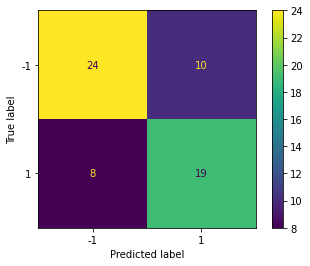

(0.6785714285714286, 0.7047930283224401)
Nearest Neighbors  ->  0.7049180327868853


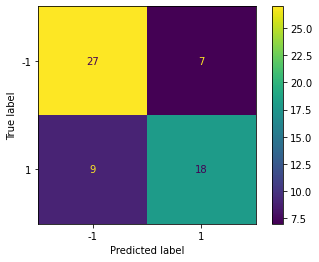

(0.6923076923076923, 0.7303921568627451)
Linear SVM  ->  0.7377049180327869


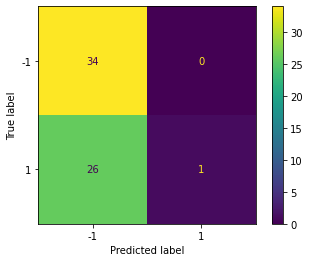

(0.07142857142857142, 0.5185185185185185)
RBF SVM  ->  0.5737704918032787


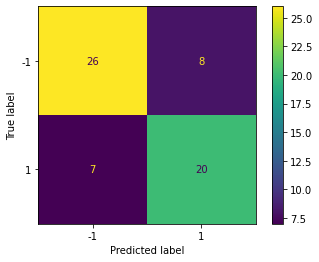

(0.7272727272727273, 0.7527233115468408)
Gaussian Process  ->  0.7540983606557377


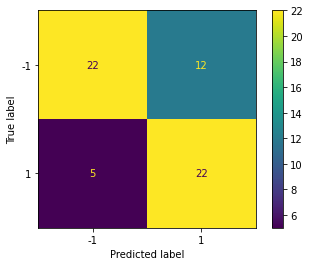

(0.7213114754098361, 0.7309368191721133)
Decision Tree  ->  0.7213114754098361


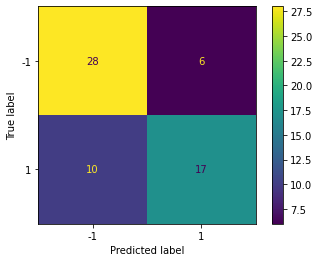

(0.68, 0.7265795206971678)
Random Forest  ->  0.7377049180327869


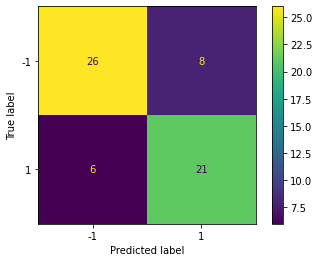

(0.75, 0.7712418300653594)
Neural Net  ->  0.7704918032786885


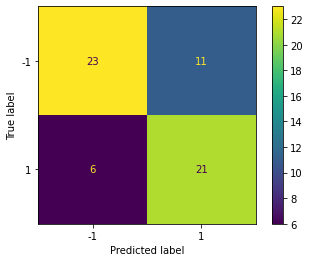

(0.711864406779661, 0.7271241830065359)
AdaBoost  ->  0.7213114754098361


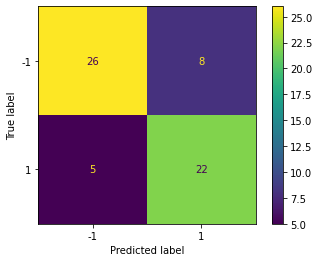

(0.7719298245614035, 0.7897603485838779)
Naive Bayes  ->  0.7868852459016393


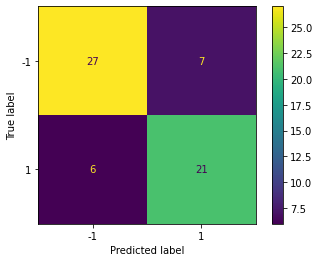

(0.7636363636363638, 0.7859477124183007)
QDA  ->  0.7868852459016393


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(train_x, train_y)
    score = clf.score(test_x, test_y)
    print(disp_cm(test_y, clf.predict(test_x)))
    print(name, " -> ", score)

In [138]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from sklearn.preprocessing import StandardScaler

In [139]:
class BostonDataset(torch.utils.data.Dataset):
    '''
    Prepare the Boston dataset for regression
    '''

    def __init__(self, X, y, scale_data=True):
        if not torch.is_tensor(X) and not torch.is_tensor(y):
            # Apply scaling if necessary
            if scale_data:
                X = StandardScaler().fit_transform(X)

            self.X = torch.from_numpy(X)
            self.y = torch.from_numpy(y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]

In [140]:
class MLP(nn.Module):
    '''
    Multilayer Perceptron for regression.
    '''
    
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(13, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 2)
        )


    def forward(self, x):
        '''
          Forward pass
        '''
        return self.layers(x)

In [141]:
torch.manual_seed(42)

In [142]:
X, y = train_x, train_y
new_y = np.zeros(shape=(len(y), 2))
for i in range(len(train_x)):
    if y[i] == -1:
        new_y[i][0] = 1
    else:
        new_y[i][1] = 1
y = np.copy(new_y)

In [143]:
dataset = BostonDataset(X, y, scale_data=False)
trainloader = torch.utils.data.DataLoader(dataset, batch_size=5, shuffle=True, num_workers=0)

In [144]:
mlp = MLP()
ori_sd = mlp.state_dict()
lr = 1e-6
ORI_MODEL = [mlp, MLP(), MLP(), MLP()]
for i in range(1, len(ORI_MODEL)):
    ORI_MODEL[i].load_state_dict(ori_sd)
LF = [nn.CrossEntropyLoss(), nn.CrossEntropyLoss(), nn.MSELoss(), nn.MSELoss()]
OPT = [torch.optim.Adam(ORI_MODEL[0].parameters(), lr=lr), 
       torch.optim.SGD(ORI_MODEL[1].parameters(), lr=lr, momentum=0.9),
       torch.optim.Adam(ORI_MODEL[2].parameters(), lr=lr), 
       torch.optim.SGD(ORI_MODEL[3].parameters(), lr=lr, momentum=0.9)]
torch.save(mlp.state_dict(), "./model/origin.pt")
print(id(ORI_MODEL[0]) == id(ORI_MODEL[1]))
for p1, p2 in zip(ORI_MODEL[0].parameters(), ORI_MODEL[1].parameters()):
    print(torch.equal(p1, p2))

False
True
True
True
True
True
True


In [145]:
# len(trainloader)
# from sklearn.datasets import load_boston
# X, y = load_boston(return_X_y=True)
print(X[0])
print(y[0])
print(type(X))
print(type(y))
print(X.shape)
print(y.shape)
print(mlp)

[-0.71355642 -1.4572959  -0.16526786 -0.0961698   0.54761386 -0.41763453
 -0.99674925 -0.46447241 -0.69663055 -0.7243226  -0.97635214 -0.71113139
 -0.89023814]
[1. 0.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(242, 13)
(242, 2)
MLP(
  (layers): Sequential(
    (0): Linear(in_features=13, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=2, bias=True)
  )
)


In [146]:
def train_model(loss_function, optimizer, save_path, test_x, test_y, mlp=mlp, epoch_num=150):
    
    loss_list = []
    acc = []

    # Run the training loop
    for epoch in range(epoch_num): # 5 epochs at maximum

        # Set current loss value
        current_loss = 0.0

        # Iterate over the DataLoader for training data
        for i, data in enumerate(trainloader):

            # Get and prepare inputs
            inputs, targets = data
            inputs, targets = inputs.float(), targets.float()
#             targets = targets.reshape((targets.shape[0], 1))

            # Zero the gradients
            optimizer.zero_grad()

            # Perform forward pass
            outputs = mlp(inputs)

            # Compute loss
            loss = loss_function(outputs, targets)

            # Perform backward pass
            loss.backward()

            # Perform optimization
            optimizer.step()

            # Print statistics
            current_loss += loss.item()
            
        pred_y = eval_model(mlp, test_x, test_y)
        
        if epoch % 200 == 0:
            print("Epoch ->", epoch + 1, "\t\tLoss ->", current_loss/len(trainloader), "\t\tAcc ->", cal_acc(test_y, pred_y))
        
        acc.append(cal_acc(test_y, pred_y))
        loss_list.append(min(current_loss/len(trainloader), 2.0))
        current_loss = 0.0

    # Process is complete.
    print('Training process has finished.')
    torch.save(mlp.state_dict(), save_path)
    return mlp, loss_list, acc

In [147]:
def cal_acc(test_y, pred_y):
    right = 0
    for i in range(len(test_y)):
        if test_y[i] == pred_y[i]:
            right += 1
    acc = right/len(test_y)
    return acc

In [148]:
def eval_model(model, test_x, test_y):
    dataset = BostonDataset(test_x, test_y, scale_data=False)
    # batch_size=len(dataset) !!! only one set !!!
    testloader = torch.utils.data.DataLoader(dataset, batch_size=len(dataset), shuffle=False, num_workers=0)
    for i, data in enumerate(testloader):
        inputs, targets = data
        inputs, targets = inputs.float(), targets.float()
        outputs = model(inputs)
    pred_y = np.zeros(shape=(len(outputs), ))
    for i in range(len(outputs)):
        if outputs[i][0] > outputs[i][1]:
            pred_y[i] = -1
        else:
            pred_y[i] = 1
    return pred_y

In [149]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, roc_curve, auc, roc_auc_score

def disp_cm(test_y, pred_y):
    cm = confusion_matrix(test_y, pred_y, labels=[-1, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[-1, 1])
    disp.plot()
    plt.show()
    fpr, tpr, thresholds = roc_curve(test_y, pred_y, pos_label=1)
    return f1_score(test_y, pred_y, average="binary"), roc_auc_score(test_y, pred_y) 

Epoch -> 1 		Loss -> 0.7196748001234872 		Acc -> 0.3114754098360656
Epoch -> 201 		Loss -> 0.6800599742908867 		Acc -> 0.5409836065573771
Epoch -> 401 		Loss -> 0.6437326231781317 		Acc -> 0.7049180327868853
Epoch -> 601 		Loss -> 0.6039628933887092 		Acc -> 0.7049180327868853
Epoch -> 801 		Loss -> 0.5577244643045931 		Acc -> 0.7213114754098361
Epoch -> 1001 		Loss -> 0.5070801742222845 		Acc -> 0.7213114754098361
Epoch -> 1201 		Loss -> 0.46354817006052756 		Acc -> 0.7049180327868853
Epoch -> 1401 		Loss -> 0.42082906377558804 		Acc -> 0.7049180327868853
Epoch -> 1601 		Loss -> 0.3840340737785612 		Acc -> 0.7049180327868853
Epoch -> 1801 		Loss -> 0.363434047723303 		Acc -> 0.7213114754098361
Epoch -> 2001 		Loss -> 0.3448201603427225 		Acc -> 0.7213114754098361
Epoch -> 2201 		Loss -> 0.32593442986206134 		Acc -> 0.7213114754098361
Epoch -> 2401 		Loss -> 0.3171480664489221 		Acc -> 0.7213114754098361
Epoch -> 2601 		Loss -> 0.30546678625503365 		Acc -> 0.7213114754098361
Epoch -> 2

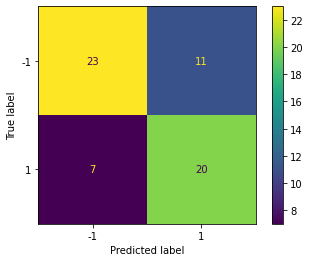

Epoch -> 1 		Loss -> 0.7200405585522555 		Acc -> 0.3114754098360656
Epoch -> 201 		Loss -> 0.7110385274400517 		Acc -> 0.3442622950819672
Epoch -> 401 		Loss -> 0.70263350739771 		Acc -> 0.39344262295081966
Epoch -> 601 		Loss -> 0.69437467686984 		Acc -> 0.4262295081967213
Epoch -> 801 		Loss -> 0.6867157196512028 		Acc -> 0.5573770491803278
Epoch -> 1001 		Loss -> 0.6798074622543491 		Acc -> 0.639344262295082
Epoch -> 1201 		Loss -> 0.6725784357713194 		Acc -> 0.6557377049180327
Epoch -> 1401 		Loss -> 0.6662992056535215 		Acc -> 0.6885245901639344
Epoch -> 1601 		Loss -> 0.6589276997410521 		Acc -> 0.639344262295082
Epoch -> 1801 		Loss -> 0.6520249028595126 		Acc -> 0.639344262295082
Epoch -> 2001 		Loss -> 0.6445106827482885 		Acc -> 0.6721311475409836
Epoch -> 2201 		Loss -> 0.6372747871340537 		Acc -> 0.6885245901639344
Epoch -> 2401 		Loss -> 0.62840714746592 		Acc -> 0.7049180327868853
Epoch -> 2601 		Loss -> 0.6213387165750776 		Acc -> 0.7049180327868853
Epoch -> 2801 		Loss 

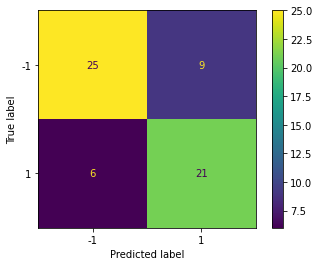

Epoch -> 1 		Loss -> 0.4712715763218549 		Acc -> 0.3114754098360656
Epoch -> 201 		Loss -> 0.3456197405348019 		Acc -> 0.4262295081967213
Epoch -> 401 		Loss -> 0.2605048953270426 		Acc -> 0.5901639344262295
Epoch -> 601 		Loss -> 0.20903009176254272 		Acc -> 0.6885245901639344
Epoch -> 801 		Loss -> 0.17534729579881747 		Acc -> 0.7213114754098361
Epoch -> 1001 		Loss -> 0.14847045521042784 		Acc -> 0.7377049180327869
Epoch -> 1201 		Loss -> 0.12636728440316355 		Acc -> 0.7377049180327869
Epoch -> 1401 		Loss -> 0.11563910878434473 		Acc -> 0.7377049180327869
Epoch -> 1601 		Loss -> 0.10899088919466855 		Acc -> 0.7540983606557377
Epoch -> 1801 		Loss -> 0.10703770166300998 		Acc -> 0.7540983606557377
Epoch -> 2001 		Loss -> 0.10382605688076238 		Acc -> 0.7540983606557377
Epoch -> 2201 		Loss -> 0.09844932819203454 		Acc -> 0.7377049180327869
Epoch -> 2401 		Loss -> 0.09705211149946767 		Acc -> 0.7377049180327869
Epoch -> 2601 		Loss -> 0.09376884391056184 		Acc -> 0.7377049180327869
Ep

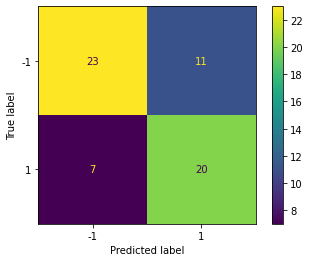

Epoch -> 1 		Loss -> 0.47083556895353357 		Acc -> 0.3114754098360656
Epoch -> 201 		Loss -> 0.3891266730366921 		Acc -> 0.32786885245901637
Epoch -> 401 		Loss -> 0.33591680015836445 		Acc -> 0.39344262295081966
Epoch -> 601 		Loss -> 0.29988965331291667 		Acc -> 0.47540983606557374
Epoch -> 801 		Loss -> 0.2752156896250589 		Acc -> 0.5901639344262295
Epoch -> 1001 		Loss -> 0.25834302208861526 		Acc -> 0.639344262295082
Epoch -> 1201 		Loss -> 0.2461843551421652 		Acc -> 0.6721311475409836
Epoch -> 1401 		Loss -> 0.23709868077112703 		Acc -> 0.6557377049180327
Epoch -> 1601 		Loss -> 0.22897129825183324 		Acc -> 0.639344262295082
Epoch -> 1801 		Loss -> 0.22270611749619854 		Acc -> 0.639344262295082
Epoch -> 2001 		Loss -> 0.2158100449917268 		Acc -> 0.6557377049180327
Epoch -> 2201 		Loss -> 0.2091252402383454 		Acc -> 0.7049180327868853
Epoch -> 2401 		Loss -> 0.2014944594429464 		Acc -> 0.7049180327868853
Epoch -> 2601 		Loss -> 0.1967963211390437 		Acc -> 0.7049180327868853
Epoch 

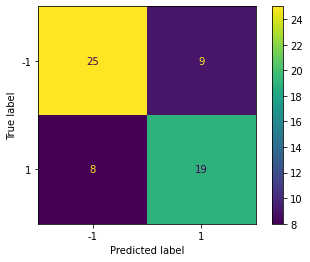

In [150]:
import copy
MODEL = []
SCORE_F1 = []
SCORE_AUC = []
LOSS = []
ACCURACY = []
NAMES = ["class_ce_adam", "class_ce_agd", "class_mse_adam", "class_mse_sgd"]
EPOCHS = [20000, 20000, 20000, 20000]
i = 0
for i in range(len(LF)):
    lf, opt = LF[i], OPT[i]
    model, loss, acc = train_model(lf, opt, save_path="./model/" + NAMES[i] + ".pt", 
                                   test_x=test_x, test_y=test_y, mlp=ORI_MODEL[i], epoch_num=EPOCHS[i])
    i += 1
    MODEL.append(model)
    f1, auc = disp_cm(test_y, eval_model(model, test_x, test_y))
    LOSS.append(loss)
    ACCURACY.append(acc)
    SCORE_F1.append(f1)
    SCORE_AUC.append(auc)

In [151]:
def plot_loss(loss_list, acc_list):
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.plot(loss_list, linewidth=4, label="Training Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='upper right')
    plt.subplot(1, 2, 2)
    plt.plot(acc_list, color="orange", linewidth=4, label="Training Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc='upper right')
    plt.show()

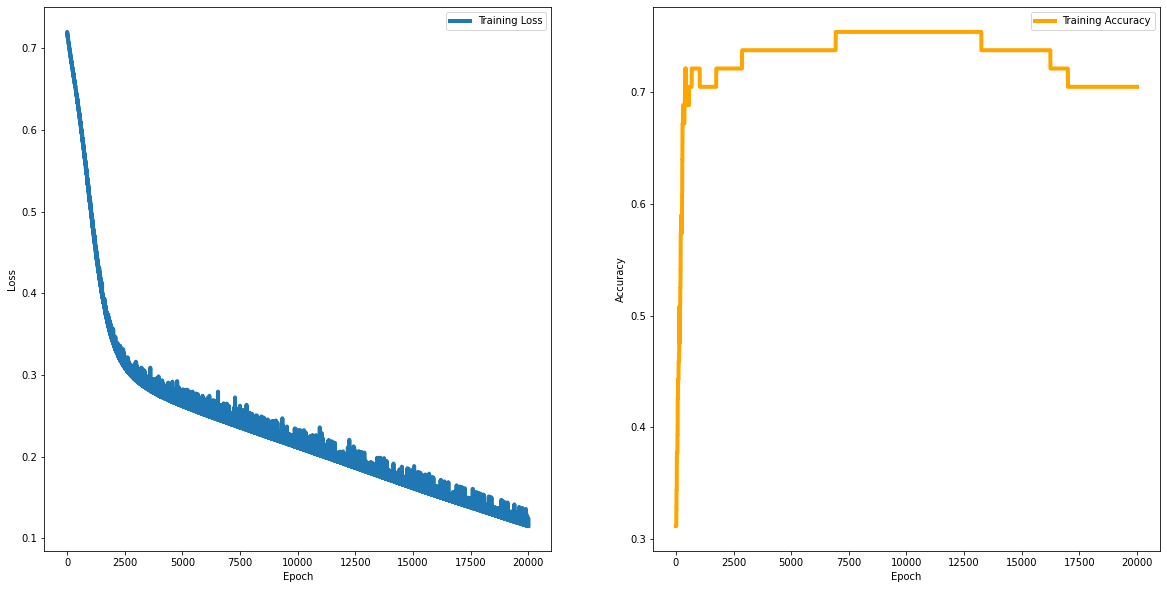

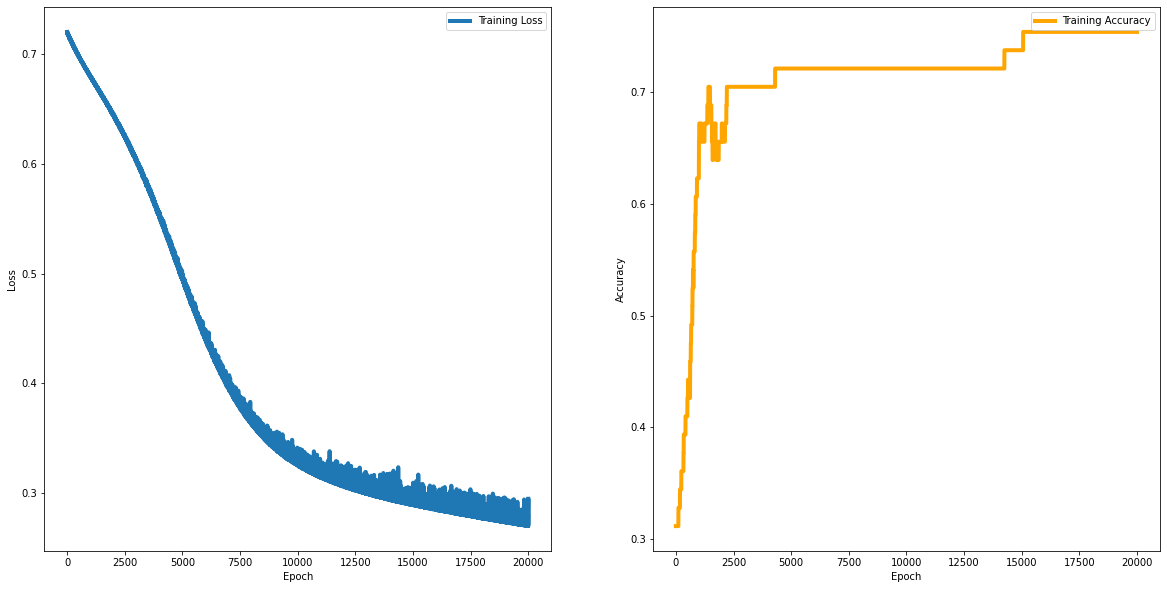

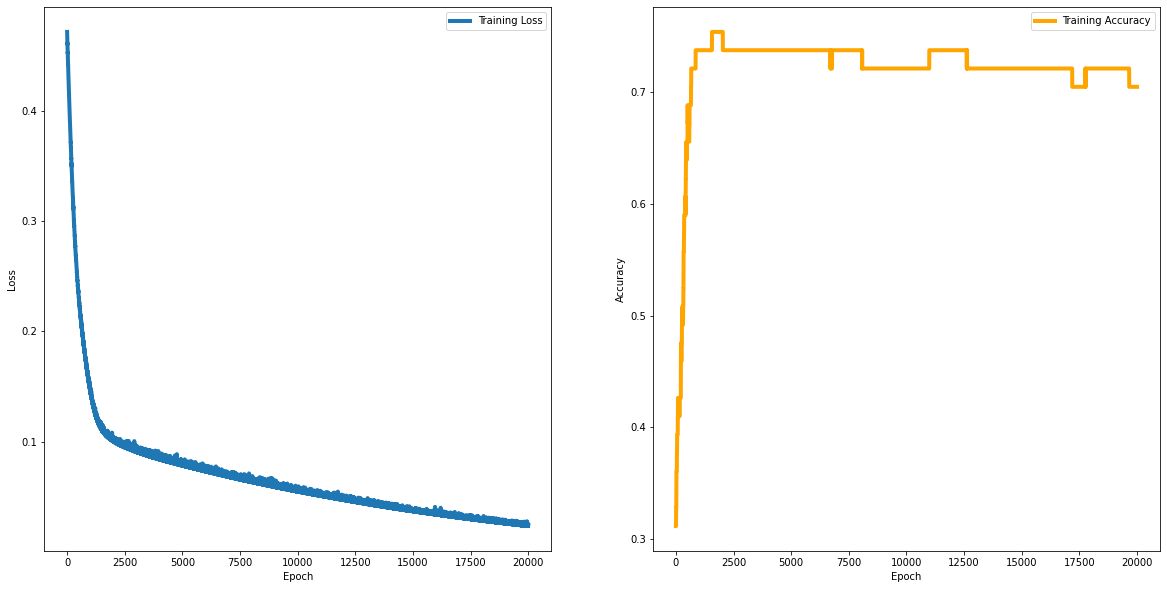

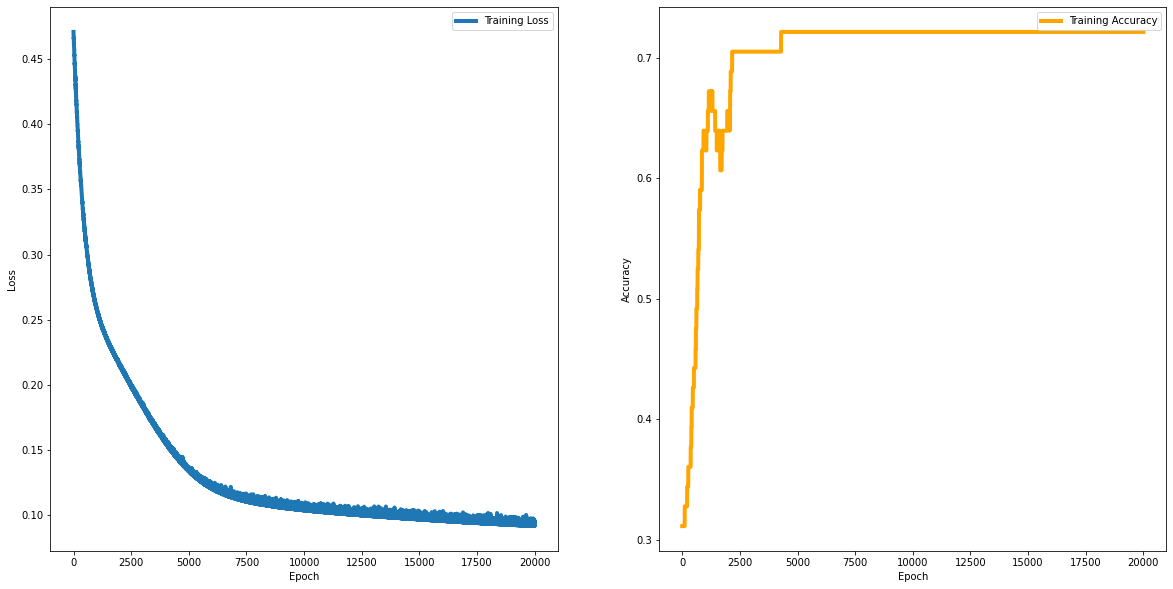

In [152]:
for i in range(len(LOSS)):
    plot_loss(LOSS[i], ACCURACY[i])

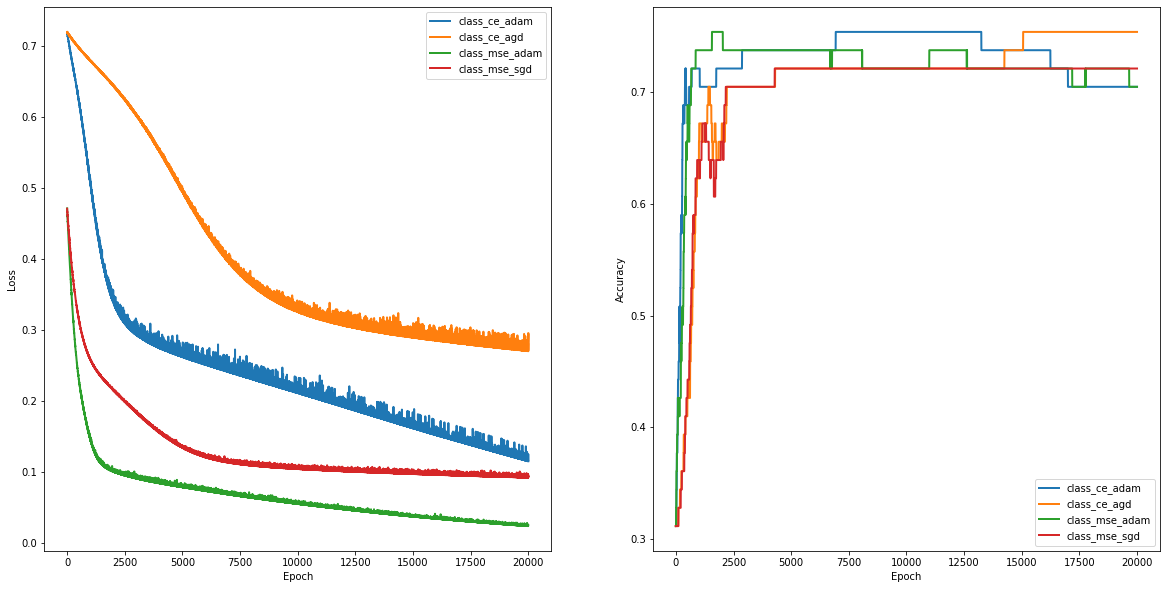

In [153]:
# report the training and testing accuracies
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
for i in range(len(LOSS)):
    plt.plot(LOSS[i], linewidth=2, label=NAMES[i])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='upper right')
plt.subplot(1, 2, 2)
for i in range(len(ACCURACY)):
    plt.plot(ACCURACY[i], linewidth=2, label=NAMES[i])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.show()

In [154]:
print(SCORE_F1)

[0.689655172413793, 0.7368421052631577, 0.689655172413793, 0.6909090909090909]


In [155]:
print(SCORE_AUC)

[0.7086056644880174, 0.7565359477124183, 0.7086056644880174, 0.7194989106753813]
